<a href="https://colab.research.google.com/github/Trojans42/House-Prices/blob/master/Team_42_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Upoad train and test CSV files
from google.colab import files #Upload Files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [0]:
import pandas as pd                 # for working with data in Python
import numpy as np
import matplotlib.pyplot as plt     # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [0]:
# use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
# check out the size of the data
print("train data shape:", train_data.shape)
print("Test data shape:", test.shape)

train data shape: (1460, 81)
Test data shape: (1459, 80)


In [0]:
# look at the first five rows using the DataFrame.head() method
# train.head()
print(train_data.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [0]:
#plotting
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [0]:
# to get more information like count, mean, std, min, max etc
# train.SalePrice.describe()
print (train_data.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


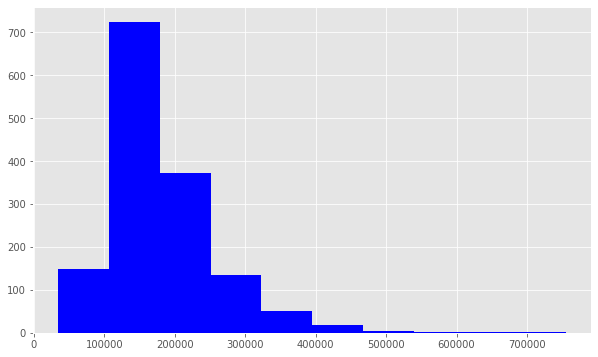

In [0]:
# to plot a histogram of SalePrice
print ("Skew is:", train_data.SalePrice.skew())
plt.hist(train_data.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


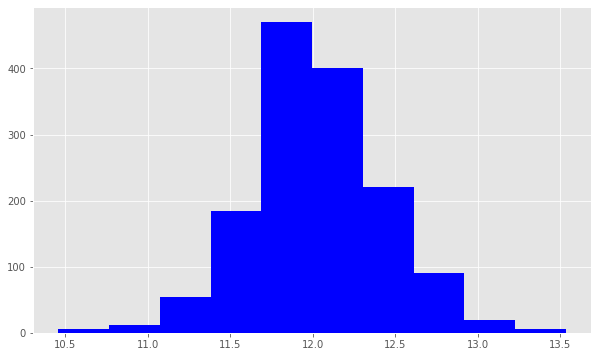

In [0]:
# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
target = np.log(train_data.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [0]:
# return a subset of columns matching the specified data types
numeric_features = train_data.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


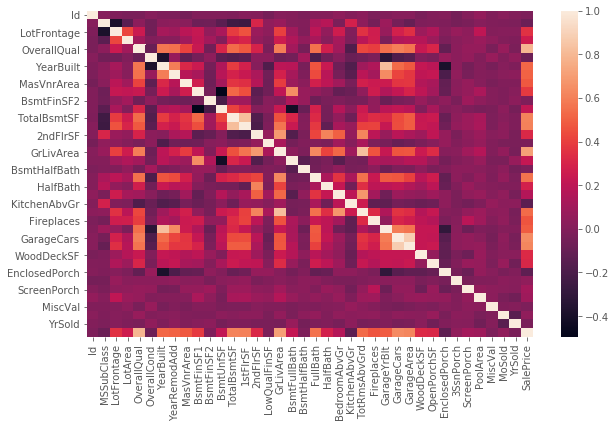

In [0]:
# Heatmap graph for finding correleations
import seaborn as sns

heat = numeric_features.corr()

sns.heatmap(heat)

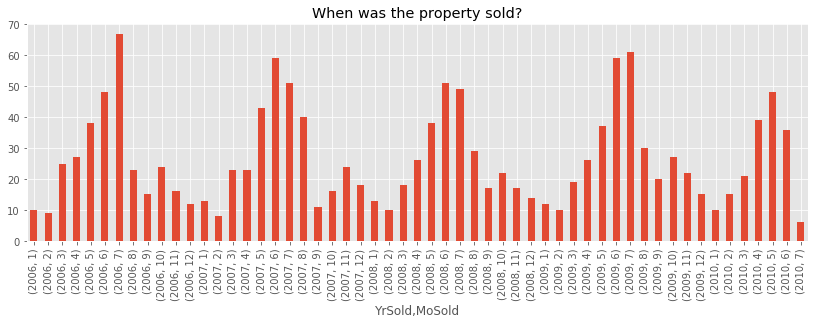

In [0]:
# graph of when property was sold
%matplotlib inline

train_data.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When was the property sold?')
plt.show()

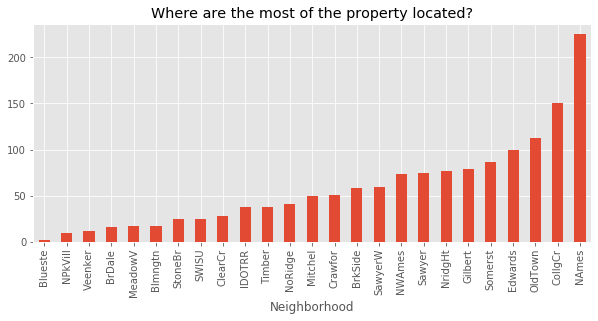

In [0]:
# Shows where most of the property is located

train_data.groupby('Neighborhood').Id.count().sort_values().plot(kind='bar', figsize=(10,4))
plt.title('Where are the most of the property located?')
plt.show()

In [0]:
# displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [0]:
#to get the unique values that a particular column has.
#train.OverallQual.unique()
print(train_data.OverallQual.unique())


[ 7  6  8  5  9  4 10  3  1  2]


In [0]:

#investigate the relationship between OverallQual and SalePrice.
#We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.
quality_pivot = train_data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)


             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


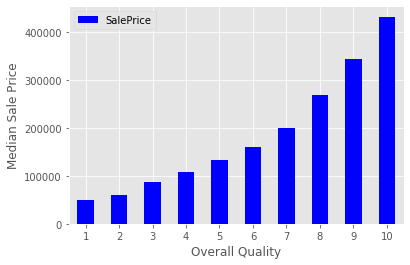

In [0]:

#visualize this pivot table more easily, we can create a bar plot
#Notice that the median sales price strictly increases as Overall Quality increases.
quality_pivot.plot(kind='bar', color='red')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

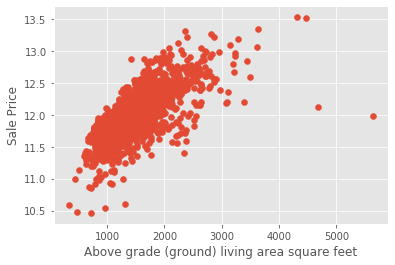

In [0]:

#to generate some scatter plots and visualize the relationship between the Ground Living Area(GrLivArea) and SalePrice
plt.scatter(x=train_data['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()


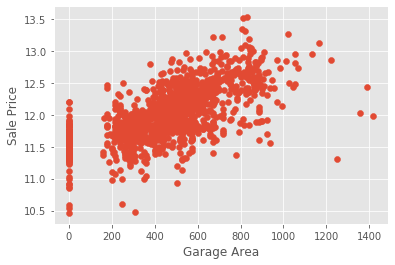

In [0]:
# do the same for GarageArea.
plt.scatter(x=train_data['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

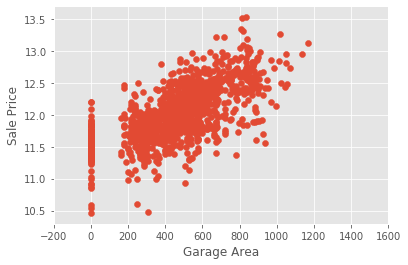

In [0]:
# create a new dataframe with some outliers removed
train = train_data[train_data['GarageArea'] < 1200]

# display the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [0]:
# create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [0]:
#to return a list of the unique values
print ("Unique values are:", train.MiscFeature.unique())


Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [0]:
# consider the non-numeric features and display details of columns
categoricals = train.select_dtypes(exclude=[np.number])

print(categoricals.describe())

       MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
count      1455   1455    91     1455  ...    281          53     1455          1455
unique        5      2     2        4  ...      4           4        9             6
top          RL   Pave  Grvl      Reg  ...  MnPrv        Shed       WD        Normal
freq       1147   1450    50      921  ...    157          48     1266          1196

[4 rows x 43 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


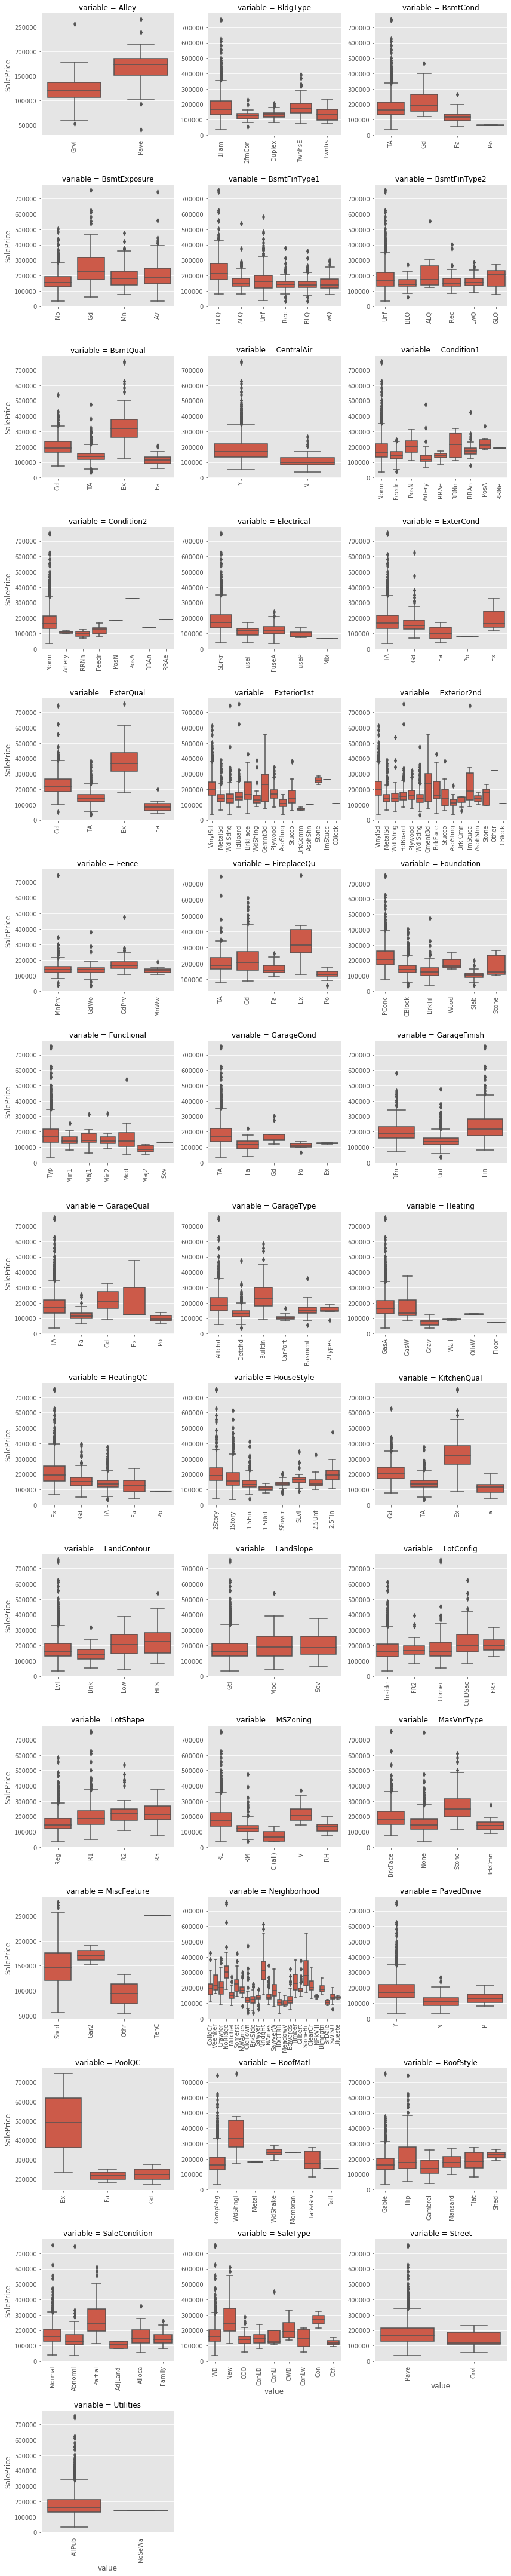

In [0]:
# candle graphs of categorical values
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(categoricals))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
# fitting the model must be applied to the test data.


print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [0]:

# use one-hot encoding to transform the data into a Boolean column.
# create a new column called enc_street.2
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

print ('Encoded: \n')
print (train.enc_street.value_counts())  # Pave and Grvl values converted into 1 and 0

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


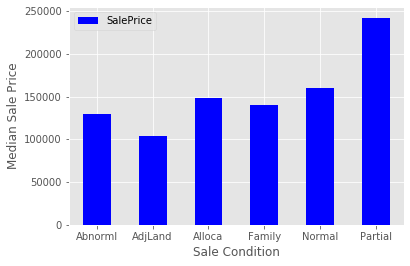

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# look at SaleCondition by constructing and plotting a pivot table
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

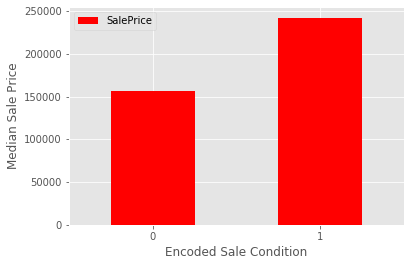

In [0]:

# explore this newly modified feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [0]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [0]:

# Check if the all of the columns have 0 null values.
# sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

0


In [0]:

# separate the features and the target variable for modeling.


y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
# exclude ID from features since Id is just an index with no relationship to SalePrice.


# also state how many percentage from train data set, we want to take as test data set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [0]:
# create a Linear Regression model.
lr = linear_model.LinearRegression()

# fit the model / Model fitting
model = lr.fit(X_train, y_train)

In [0]:
# Evaluate the performance and visualize results

print("R^2 is: \n", model.score(X_test, y_test))


R^2 is: 
 0.8882477709262494


In [0]:
# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

In [0]:
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519568518


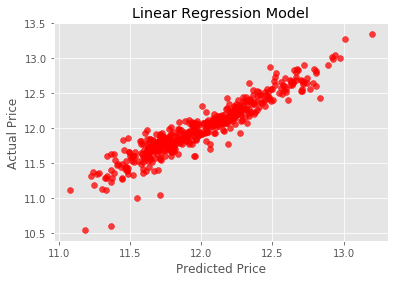

In [0]:
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='r')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

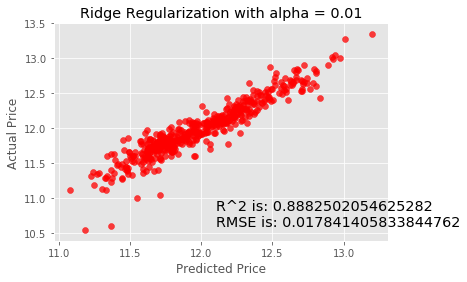

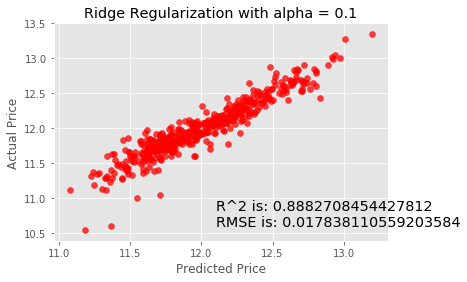

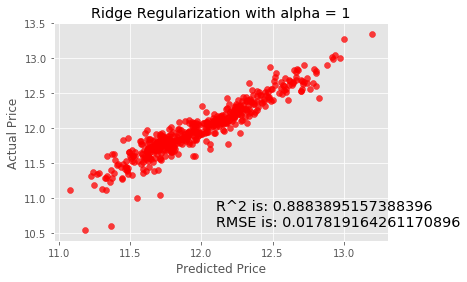

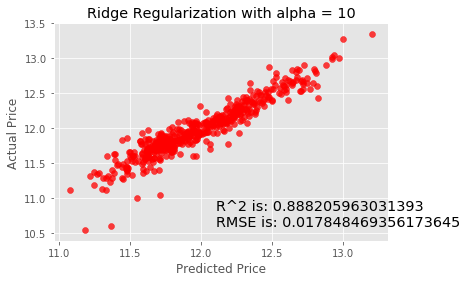

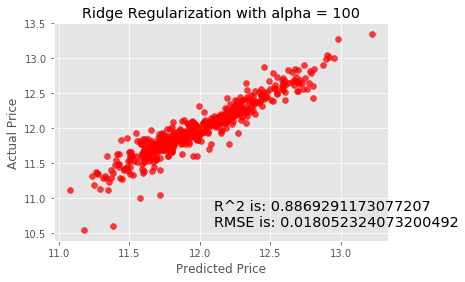

In [0]:
# experiment by looping through a few different values of alpha, and see how this changes our results.

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [0]:
model.score(X_test, y_test)

0.8882477709262494

In [0]:
# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()

submission['Id'] = test.Id

In [0]:
# select the features from the test data for the model
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [0]:
# generate predictions
predictions = model.predict(feats)

In [0]:
# transform the predictions to the correct form
final_predictions = np.exp(predictions)

In [0]:
# check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Final predictions are: 
 [128959.49172586 122920.74024355 175704.82598101 200050.83263755
 182075.46986405 172318.33397534 191064.621642   165488.55901671
 193158.99133192 116214.02546462]


In [0]:
# assign these predictions and check
submission['SalePrice'] = final_predictions

print(submission)

        Id      SalePrice
0     1461  128959.491726
1     1462  122920.740244
2     1463  175704.825981
3     1464  200050.832638
4     1465  182075.469864
...    ...            ...
1454  2915   97120.457957
1455  2916   98661.530074
1456  2917  184435.363039
1457  2918  109901.826465
1458  2919  240479.319964

[1459 rows x 2 columns]


In [0]:
# export to a .csv file as Kaggle expects.

submission.to_csv('submission1.csv', index=False)

In [0]:
# download submission file
from google.colab import files
files.download("submission1.csv")